In [87]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing
import random
import os
from surprise import SVD
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy

In [5]:
#reading csv file and creating dataframe
df1 = pd.read_csv(r"training.csv")

In [40]:
df1.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,52021,"[0, 1]",4,When you read row all the books series there a...,"03 29, 2014",15012,Amazon Customer,Big bro' Big guy,1396051200
1,42867,"[1, 1]",5,goodness LOVED this book was the edge seat the...,"10 16, 2013",20330,Kristina L. Metcalf,Oh My!!,1381881600
2,9168,"[1, 1]",5,The cover the first book got attention was hoo...,"02 12, 2013",62907,Andrea Ortiz,Awesome!!,1360627200
3,26051,"[0, 0]",4,can say that read any urban fiction before but...,"03 13, 2014",11778,M Sockel,A refreshing venture into urban fiction,1394668800
4,30061,"[0, 0]",4,The Murder Sissingham Hall likeable mystery no...,"06 17, 2013",63717,lisa marie,likeable english tea cosy mystery,1371427200


In [6]:
#grouping asin & overall and finding mean
df1.groupby('asin')['overall'].mean().sort_values(ascending=False).head()

asin
29387    5.0
11715    5.0
53448    5.0
11709    5.0
28623    5.0
Name: overall, dtype: float64

In [7]:
#grouping asin and overall and finding counts
df1.groupby('asin')['overall'].count().sort_values(ascending=False).head()

asin
9482     774
29867    550
29817    366
55191    349
46283    342
Name: overall, dtype: int64

In [8]:
#creating a new dataframe including mean overall
overall_mean_count_df = pd.DataFrame(df1.groupby('asin')['overall'].mean())

In [9]:
#adding overall count in the dataframe
overall_mean_count_df['overall_counts'] = pd.DataFrame(df1.groupby('asin')['overall'].count())

In [11]:
# adding reviewerID in the dataframe
overall_mean_count_df['reviewerID'] = pd.DataFrame(df1['reviewerID'])

In [12]:
overall_mean_count_df.head()

,overall,overall_counts,reviewerID
asin,,,
0,4.000000,5,15012
1,4.200000,5,20330
2,4.500000,4,62907
3,3.333333,3,11778
4,4.166667,6,63717


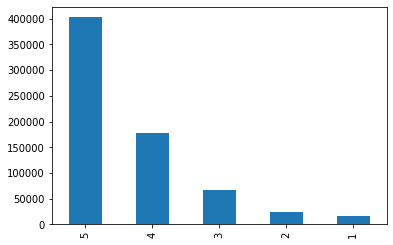

In [13]:
#plotting bar chart for counts of each rating
df1.overall.value_counts().plot(kind='bar')
plt.show()

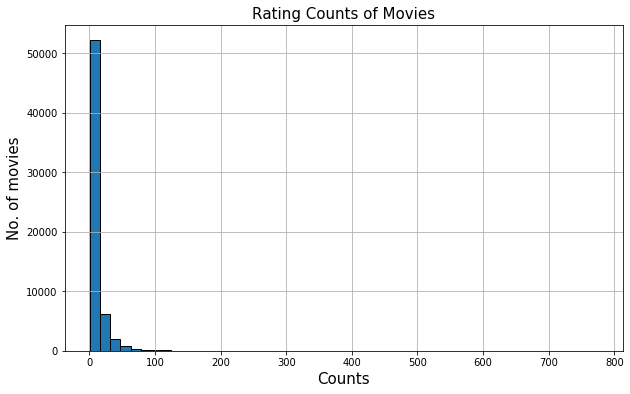

In [14]:
# generating histogram for rating counts of each movie
plt.xlabel('Counts',fontsize=15)
plt.ylabel('No. of movies',fontsize=15)
plt.title('Rating Counts of Movies',fontsize=15)
plt.rcParams['patch.force_edgecolor'] = True
overall_mean_count_df['overall_counts'].hist(bins=50,figsize=(10,6))

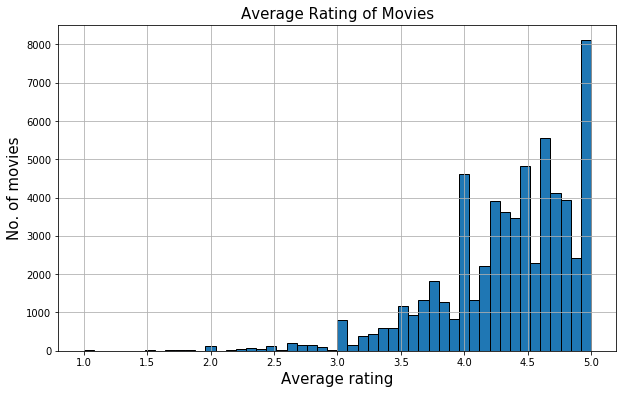

In [15]:
#generating histogram to find counts of movies for each average rating
plt.xlabel('Average rating',fontsize=15)
plt.ylabel('No. of movies',fontsize=15)
plt.title('Average Rating of Movies',fontsize=15)
plt.rcParams['patch.force_edgecolor'] = True
overall_mean_count_df['overall'].hist(bins=50,figsize=(10,6))

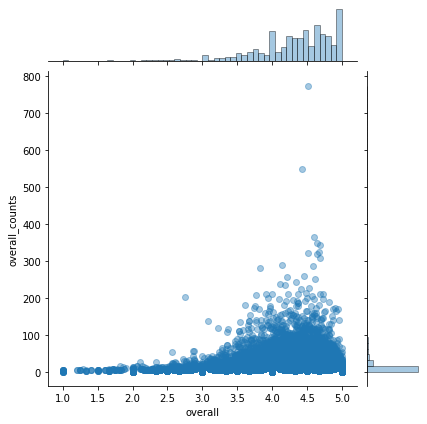

In [16]:
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['figure.figsize'] = 10,6
sns.jointplot(x='overall', y='overall_counts', data=overall_mean_count_df, alpha=0.4)

In [18]:
# finding correlation for numeric columns
df_corr = df1.corr()

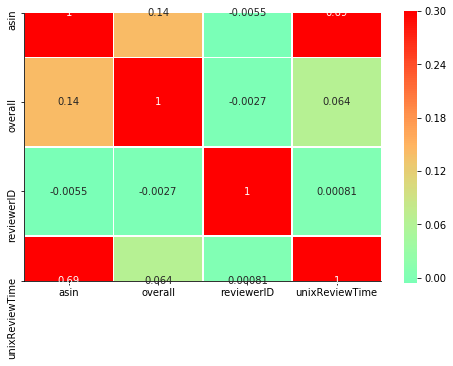

In [19]:
# creating heat map for the correlation
hmap=sns.heatmap(df_corr,vmax=.3, center=0,square=True, linewidths=.5, annot=True, cmap='rainbow')
sns.despine()
hmap.figure.set_size_inches(8,5)

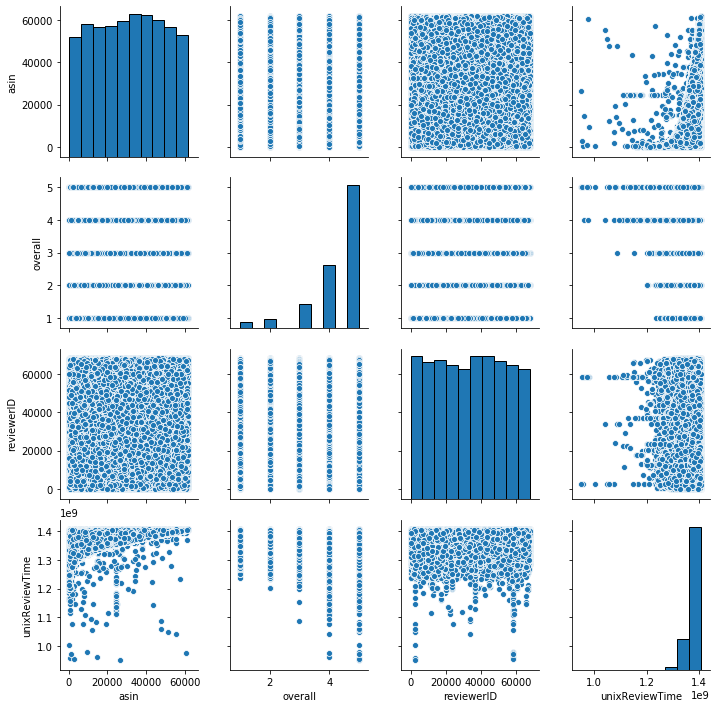

In [21]:
# building pairplot of numeric values
pplot = sns.pairplot(df1)
pplot

In [22]:
# importing nltk for text mining
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saumil0257/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
df1.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,52021,"[0, 1]",4,When you read in a row all the books of a seri...,"03 29, 2014",15012,Amazon Customer,Big bro' Big guy,1396051200
1,42867,"[1, 1]",5,"Oh my goodness, I LOVED this book!!! I was on ...","10 16, 2013",20330,Kristina L. Metcalf,Oh My!!,1381881600
2,9168,"[1, 1]",5,The cover of the first book got my attention. ...,"02 12, 2013",62907,Andrea Ortiz,Awesome!!,1360627200
3,26051,"[0, 0]",4,I can't say that I've read any urban fiction b...,"03 13, 2014",11778,M Sockel,A refreshing venture into urban fiction,1394668800
4,30061,"[0, 0]",4,The Murder at Sissingham Hall is a likeable my...,"06 17, 2013",63717,lisa marie,likeable english tea cosy mystery,1371427200


In [24]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([str(text) for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

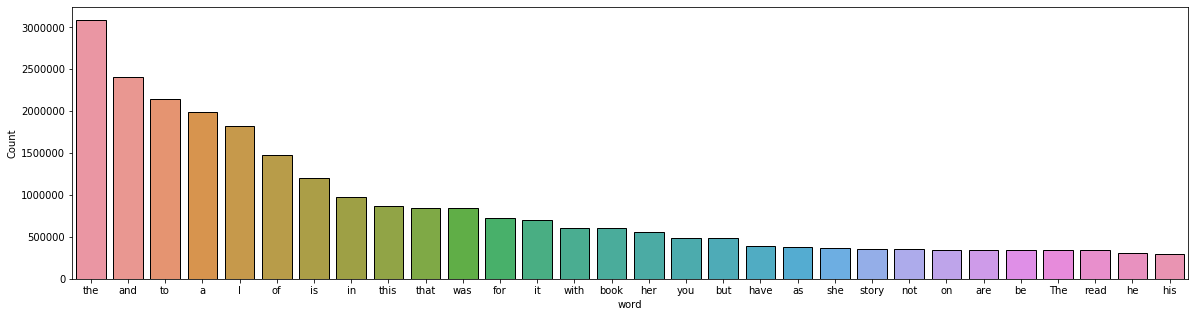

In [25]:
freq_words(df1['reviewText'])

In [26]:
# remove unwanted characters, numbers and symbols
df1['reviewText'] = df1['reviewText'].str.replace("[^a-zA-Z#]", " ")

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [28]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df1['reviewText'] = df1['reviewText'].apply(lambda x: ' '.join([w for w in str(x).split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df1['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

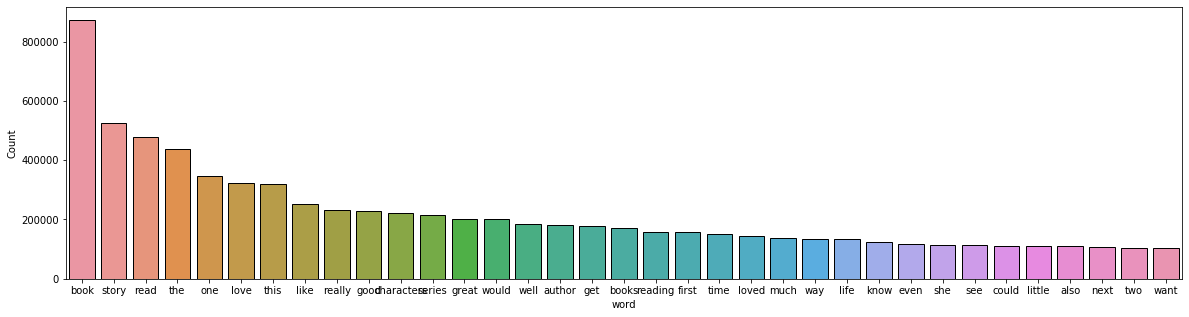

In [29]:
freq_words(reviews, 35)

In [30]:
#Library for building wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [45]:
heading_1 = df1[df1["overall"]==1]["summary"] # Extract only Summary of reviews with overall == 1
collapsed_heading_1 = heading_1.str.cat(sep=' ')

heading_2 = df1[df1["overall"]==2]["summary"] # Extract only Summary of reviews with overall == 2
collapsed_heading_2 = heading_2.str.cat(sep=' ')

heading_3 = df1[df1["overall"]==3]["summary"] # Extract only Summary of reviews with overall == 3
collapsed_heading_3 = heading_3.str.cat(sep=' ')

heading_4 = df1[df1["overall"]==4]["summary"] # Extract only Summary of reviews with overall == 4
collapsed_heading_4 = heading_4.str.cat(sep=' ')

heading_5 = df1[df1["overall"]==5]["summary"] # Extract only Summary of reviews with overall == 5
collapsed_heading_5 = heading_5.str.cat(sep=' ')

In [46]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["Subject","re","fw","fwd"])

Word Cloud for Rating 1


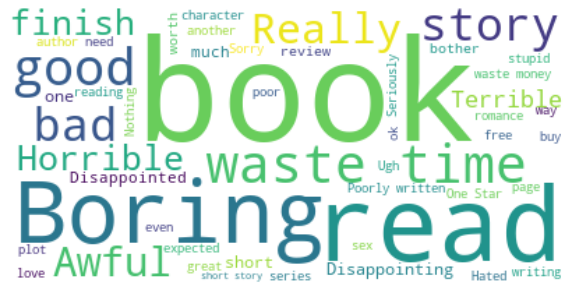

In [43]:
print("Word Cloud for Rating 1")

# Generate a word cloud image for summary of reviews with overall == 1
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Word Cloud for Rating 2


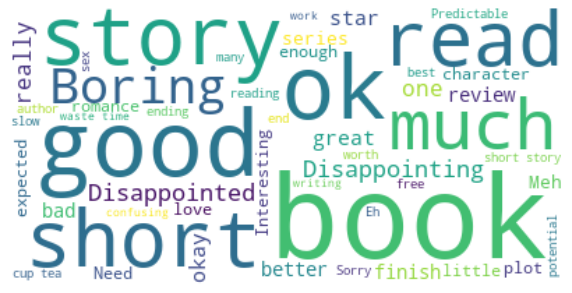

In [47]:
print("\nWord Cloud for Rating 2")

# Generate a word cloud image for summary of reviews with overall == 2
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Word Cloud for Rating 3


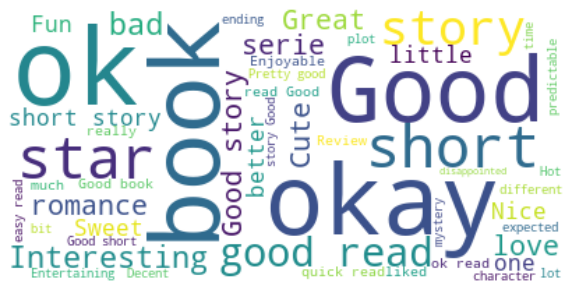

In [48]:
print("\nWord Cloud for Rating 3")
# Generate a word cloud image for summary of reviews with overall == 3
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Word Cloud for Rating 4


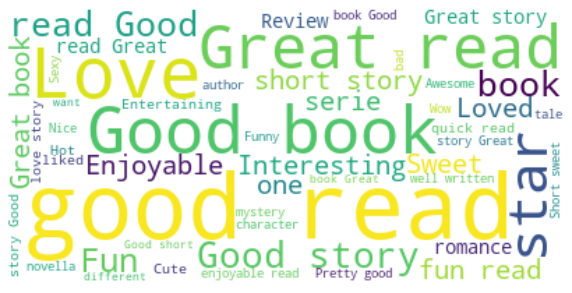

In [49]:
print("\nWord Cloud for Rating 4")

# Generate a word cloud image for summary of reviews with overall == 4
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_4)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Word Cloud for Rating 5


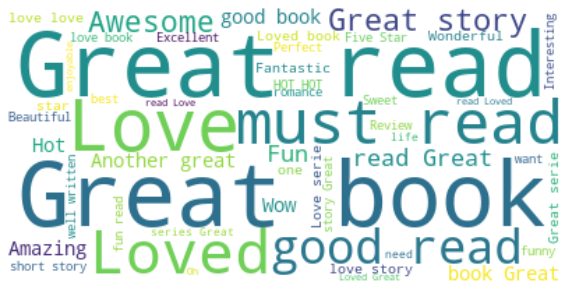

In [50]:
print("\nWord Cloud for Rating 5")
# Generate a word cloud image for summary of reviews with overall == 5
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_5)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [51]:
# reading the test and train set and creating a dataframe
train_data= pd.read_csv(r"training.csv")
test_data= pd.read_csv(r"test_with_asin_reviewerID.csv")

In [53]:
train_data.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,52021,"[0, 1]",4,When you read in a row all the books of a seri...,"03 29, 2014",15012,Amazon Customer,Big bro' Big guy,1396051200
1,42867,"[1, 1]",5,"Oh my goodness, I LOVED this book!!! I was on ...","10 16, 2013",20330,Kristina L. Metcalf,Oh My!!,1381881600
2,9168,"[1, 1]",5,The cover of the first book got my attention. ...,"02 12, 2013",62907,Andrea Ortiz,Awesome!!,1360627200
3,26051,"[0, 0]",4,I can't say that I've read any urban fiction b...,"03 13, 2014",11778,M Sockel,A refreshing venture into urban fiction,1394668800
4,30061,"[0, 0]",4,The Murder at Sissingham Hall is a likeable my...,"06 17, 2013",63717,lisa marie,likeable english tea cosy mystery,1371427200


In [54]:
# Adding a new column overall, to make test dataframe similar to train dataframe
test_data['overall']= 0

In [55]:
#dropping all columns except asin, reviewerID, overall
train_data=train_data.drop([ 'reviewTime', 'reviewerName', 'unixReviewTime', 'helpful', 'reviewText', 'summary'], axis=1)

In [56]:
train_data.head()

,asin,overall,reviewerID
0,52021,4,15012
1,42867,5,20330
2,9168,5,62907
3,26051,4,11778
4,30061,4,63717


In [57]:
#data preparation for train set
traindata= {'asin': list(train_data.asin),
 'reviewerID': list(train_data.reviewerID),
 'overall': list(train_data.overall)}

In [58]:
#data preparation for test set
testdata= {'asin': list(test_data.asin),
'reviewerID': list(test_data.reviewerID),
 'overall': list(test_data.overall)}

In [59]:
#loading into dataframe
df=pd.DataFrame(traindata)
dt=pd.DataFrame(testdata)

In [60]:
dt.head()

,asin,reviewerID,overall
0,28105,57436,0
1,965,57436,0
2,31199,18624,0
3,39244,32196,0
4,25050,32196,0


In [61]:
#reader class using only the rating parameter
reader= Reader(rating_scale=(1, 5))

In [62]:
#arranging training dataframe
data= Dataset.load_from_df(df[['reviewerID', 'asin', 'overall']], reader)

In [63]:
#arranging test dataframe
testdat= Dataset.load_from_df(dt[['reviewerID', 'asin', 'overall']], reader)

In [64]:
#building full train set
trainset= data.build_full_trainset()

In [65]:
# building test set like train set
testset= testdat.build_full_trainset()

In [66]:
#building full test set
testset = testset.build_testset()

In [67]:
#initializing SVD algorithm with n_epochs = 150 and n_factors = 150
svd = SVD(n_epochs=150,n_factors=150)
#fitting the model with train set
model=svd.fit(trainset)

In [68]:
#making predictions on the test set using svd algorithm 
predictions1= svd.test(testset)

In [69]:
#printing predictions
predictions1

[Prediction(uid=57436, iid=28105, r_ui=0.0, est=3.9484337689950393, details={'was_impossible': False}),
 Prediction(uid=57436, iid=965, r_ui=0.0, est=3.0331512175975486, details={'was_impossible': False}),
 Prediction(uid=18624, iid=31199, r_ui=0.0, est=4.94924131317249, details={'was_impossible': False}),
 Prediction(uid=32196, iid=39244, r_ui=0.0, est=4.917561441394056, details={'was_impossible': False}),
 Prediction(uid=32196, iid=25050, r_ui=0.0, est=5, details={'was_impossible': False}),
 Prediction(uid=32196, iid=54586, r_ui=0.0, est=4.917344649409444, details={'was_impossible': False}),
 Prediction(uid=32196, iid=38991, r_ui=0.0, est=5, details={'was_impossible': False}),
 Prediction(uid=32196, iid=52203, r_ui=0.0, est=4.75867265753237, details={'was_impossible': False}),
 Prediction(uid=54040, iid=34452, r_ui=0.0, est=4.0478676650319, details={'was_impossible': False}),
 Prediction(uid=54040, iid=36776, r_ui=0.0, est=4.390298998050174, details={'was_impossible': False}),
 Predi

In [71]:
#creating a new dataframe with predictions
results = pd.DataFrame(predictions1)

In [72]:
#Adding new column, which includes reviewerId and asin
results['RecommendationId'] = dt.reviewerID.astype(str) + '-' + dt.asin.astype(str)

In [73]:
results.head()

,uid,iid,r_ui,est,details,RecommendationId
0,57436,28105,0.0,3.948434,{'was_impossible': False},57436-28105
1,57436,965,0.0,3.033151,{'was_impossible': False},57436-965
2,18624,31199,0.0,4.949241,{'was_impossible': False},18624-31199
3,32196,39244,0.0,4.917561,{'was_impossible': False},32196-39244
4,32196,25050,0.0,5.000000,{'was_impossible': False},32196-25050


In [74]:
#renaming the column as expected
results.rename(columns = {'est':'ratings'}, inplace = True) 

In [75]:
#Keeping only these 2 columns and arranging them
results=results[['RecommendationId','ratings']]

In [76]:
results.head()

,RecommendationId,ratings
0,57436-28105,3.948434
1,57436-965,3.033151
2,18624-31199,4.949241
3,32196-39244,4.917561
4,32196-25050,5.000000


In [78]:
#renaming the column as expected
results.rename(columns = {'RecommendationId':'key'}, inplace = True) 

In [79]:
#renaming the column as expected
results.rename(columns = {'ratings':'overall'}, inplace = True) 

In [81]:
results.head()

,key,overall
0,57436-28105,3.948434
1,57436-965,3.033151
2,18624-31199,4.949241
3,32196-39244,4.917561
4,32196-25050,5.000000


In [83]:
results.shape

(291098, 2)

In [85]:
#Exporting the dataframe into a csv file, excluding the index, in the expected format
results.to_csv('solution.csv', index=False)